In [30]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

import src.utils.utils as u
import src.preprocessing.preprocessing as prep

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of src.preprocessing.preprocessing failed: Traceback (most recent call last):
  File "C:\Users\Helia\anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\Helia\anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\Users\Helia\anaconda3\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\Helia\anaconda3\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "C:\Users\Helia\Documents\Repositori

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import constants as cst

def build_prediction_pipeline(estimator):
    '''
    Builds a pipeline to combine the column encoder and the estimator
    Args:
        estimator: prediction model
    '''
    encoder = create_column_encoder(cst.categorical_columns, cst.numerical_columns)
    pipeline = Pipeline(([("encoder", encoder), ("estimator", estimator)]))
    return pipeline


def create_column_encoder(categorical_columns: list, numerical_columns: list):
    '''
    Encodes categorical columns and scales numerical columns
    Args:
        categorical_columns (list): list of categorical columns
    '''
    encoder = make_column_transformer(
        (OneHotEncoder(handle_unknown="ignore"), categorical_columns),
        remainder="passthrough",
    )
    return encoder

In [7]:
df = pd.read_excel('data/data_project.xlsx')
config = u.load_config_file('configs/config.json')

In [8]:
df_surrogate = df[~df['y_hat'].isna()].reset_index(drop=True)

In [9]:
df_surrogate.drop(columns=['CreditRisk (y)'], inplace=True)

In [34]:
spec_conf = config["unknown_model_surrogate"]
X_train, X_test, y_train, y_test = prep.


C:\Users\Helia\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Helia\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,CreditDuration,CreditAmount,InstallmentRate,Age,NumberOfCredits,EmploymentDuration,Savings,Group,Gender,CreditHistory_A31,...,Housing_A153,Purpose_A41,Purpose_A410,Purpose_A42,Purpose_A43,Purpose_A44,Purpose_A45,Purpose_A46,Purpose_A48,Purpose_A49
0,0.142857,0.077074,0.333333,0.296296,0.0,0.75,0.25,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.142857,0.048661,0.333333,0.000000,0.0,0.50,0.25,1,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.035714,0.080536,0.666667,0.574074,0.0,0.75,0.25,1,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.196429,0.151862,0.333333,0.111111,0.0,0.75,0.25,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.464286,0.116786,1.000000,0.074074,0.0,0.50,0.25,1,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,0.357143,0.081058,1.000000,0.648148,0.0,1.00,0.25,1,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
416,0.107143,0.023841,1.000000,0.481481,0.0,1.00,0.75,1,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
417,0.214286,0.147812,0.333333,0.425926,0.0,1.00,0.25,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
418,0.196429,0.100784,1.000000,0.370370,0.0,1.00,0.25,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [56]:
encoding_employment = {'A71': 0, 'A72': 1, 'A73': 2, 'A74': 3, 'A75': 4}
encoding_savings = {'A65': 0, 'A61': 1, 'A62': 2, 'A63': 3, 'A64': 4}
df_surrogate.loc[:,'EmploymentDuration'] = df_surrogate.loc[:,'EmploymentDuration'].map(encoding_employment)
df_surrogate.loc[:,'Savings'] = df_surrogate.loc[:,'Savings'].map(encoding_savings)
df_surrogate

,CreditDuration,CreditAmount,InstallmentRate,Age,NumberOfCredits,CreditHistory,EmploymentDuration,Housing,Purpose,Savings,Group,Gender,y_hat
0,12,2096,2,49,1,A34,3,A152,A46,1,1,0,0.852053
1,24,1282,4,32,1,A32,2,A152,A43,2,1,1,0.690418
2,12,1804,3,44,1,A34,1,A152,A41,2,1,0,0.924895
3,60,6836,3,63,2,A33,4,A152,A49,1,0,0,0.835083
4,18,1913,3,36,1,A32,1,A152,A49,4,1,0,0.902313
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,18,976,1,23,1,A32,1,A152,A40,1,1,1,0.345421
596,9,1449,3,27,2,A32,3,A152,A49,1,1,1,0.806962
597,30,2181,4,36,2,A34,4,A152,A40,0,1,0,0.962933
598,60,7418,1,27,1,A33,2,A152,A43,0,0,0,0.888050


In [57]:
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
one_hot_columns = ['CreditHistory', 'Housing', 'Purpose']
encoded_array = encoder.fit_transform(df_surrogate[one_hot_columns])
df_encoded = pd.DataFrame(encoded_array, columns=encoder.get_feature_names(one_hot_columns))
#concat with original data
df_surrogate = pd.concat([df_surrogate, df_encoded], axis=1).drop(columns=one_hot_columns)
df_surrogate

C:\Users\Helia\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,CreditDuration,CreditAmount,InstallmentRate,Age,NumberOfCredits,EmploymentDuration,Savings,Group,Gender,y_hat,...,Housing_A153,Purpose_A41,Purpose_A410,Purpose_A42,Purpose_A43,Purpose_A44,Purpose_A45,Purpose_A46,Purpose_A48,Purpose_A49
0,12,2096,2,49,1,3,1,1,0,0.852053,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,24,1282,4,32,1,2,2,1,1,0.690418,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,12,1804,3,44,1,1,2,1,0,0.924895,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,60,6836,3,63,2,4,1,0,0,0.835083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,18,1913,3,36,1,1,4,1,0,0.902313,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,18,976,1,23,1,1,1,1,1,0.345421,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
596,9,1449,3,27,2,3,1,1,1,0.806962,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
597,30,2181,4,36,2,4,0,1,0,0.962933,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
598,60,7418,1,27,1,2,0,0,0,0.888050,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [58]:
numerical_cols = ['CreditDuration', 'CreditAmount', 'InstallmentRate', 'Age', 'NumberOfCredits', 'EmploymentDuration', 'Savings']
scaler = MinMaxScaler()
df_surrogate[numerical_cols] = scaler.fit_transform(df_surrogate[numerical_cols])

In [66]:
X_surrogate = df_surrogate.drop(columns=['y_hat'])
y_surrogate = df_surrogate['y_hat']

In [72]:
X_train_surrogate, X_test_surrogate, y_train_surrogate, y_test_surrogate = train_test_split(X_surrogate, y_surrogate, test_size=0.3)

In [73]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_surrogate, y_train_surrogate)

In [80]:
y_pred = lin_reg.predict(X_test_surrogate)
score = r2_score(y_test_surrogate, y_pred)
score

0.3572934867002907

In [81]:
lin_reg.coef_

array([-0.29035263, -0.15360787, -0.11381177,  0.2169833 , -0.15084067,
        0.13665312,  0.06375491,  0.06488077, -0.08546236, -0.12543297,
       -0.02729158,  0.06264151,  0.1587353 ,  0.09062412,  0.00425766,
        0.20863661, -0.11878899,  0.08833217,  0.14360097,  0.13436882,
        0.16799365, -0.02040649,  0.19156096,  0.14298919])

In [84]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train_surrogate, y_train_surrogate)

DecisionTreeRegressor()

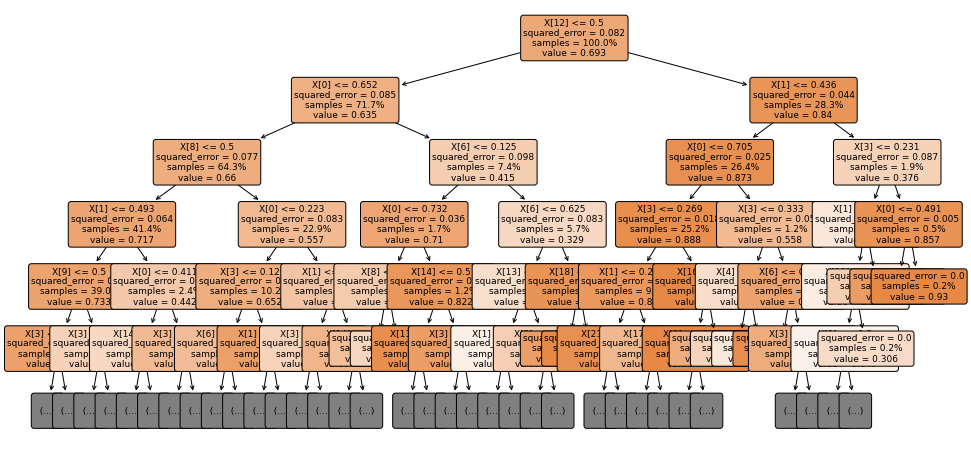

In [91]:
fig = plt.figure(figsize=(16, 8))
vis = plot_tree(decision_tree, max_depth=5, fontsize=9, proportion=True, filled=True, rounded=True)

In [94]:
decision_tree.score(X_test_surrogate, y_test_surrogate)

-0.03195274354815436

In [16]:
test_list = []
if not test_list:
    print('hello')

hello
